# Big Data  분석(II) 일일 과제물

##### A2_노소은

### <분석목표 : 생존률에 영향을 미치는 영향인자 도출>

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### 가설

#### 가설1: 선실 등급은 생존에 영향을 주는 설명변수일 것이다.
#### 가설2: 성별은 생존에 영향을주는 설명변수일 것이다.
#### 가설3: 나이는 생존에 영향을 주는 설명변수일 것이다.
#### 가설4: 승선장소는 생존에 영향을 주는 설명변수일 것이다.
#### 가설5: 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.
#### 가설6: 함께 탑승수(형제, 배우자)는 생존에 영향을 주는 설명변수일 것이다.
#### 가설7: 합께 탑승수(자녀, 부모)는 생존에 영향을 주는 설명변수일 것이다.

--------------------------------------------------------------------------------

### 패키지 

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"
#matplotlib.rc('font',family='MalgunGothic')

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1. 데이터 속성 및 기술 통계량 확인

In [10]:
df_Titanic=pd.read_csv("C:/Users/소은/Desktop/Academy/빅데이터/Big Data 분석/Titanic.csv", engine="python")
df_Titanic.head()    #데이터의 모양을 확인한다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_Titanic.info()     #데이터의 타입을 체크한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


------------------------------------------------------------------------------
변수설명
------------------------------------------------------------------------------
survival - 생존여부 ( 0 = No, 1 = Yes )  
pclass - 티켓 등급 ( 1 = 1st, 2 = 2nd, 3 = 3rd )  
sex - 성별  
Age - 나이   
sibsp - 타이타닉에 승선한 형제자매 또는 배우자의 수  
parch - 타이타닉에 승선한 부모 - 자식의 수  
ticket - 티켓 번호  
fare - 승선 요금  
cabin - 선실 번호  
embarked - 승선 항구 이름 ( C = Cherbourg, Q = Queenstown, S = Southampton )

------------------------------------------------------------------------------

In [18]:
#Survived와 PClass 변수가 범주형 int64로 잘못 되어있으므로 형변환한다.

df_Titanic['Survived'] = df_Titanic['Survived'].astype(object)
df_Titanic['Pclass'] = df_Titanic['Pclass'].astype(object)

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2. 목표 변수 및 설명변수(범주형/연속형 변수별)의 분포 확인

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220C411C408>,
      dtype=object)

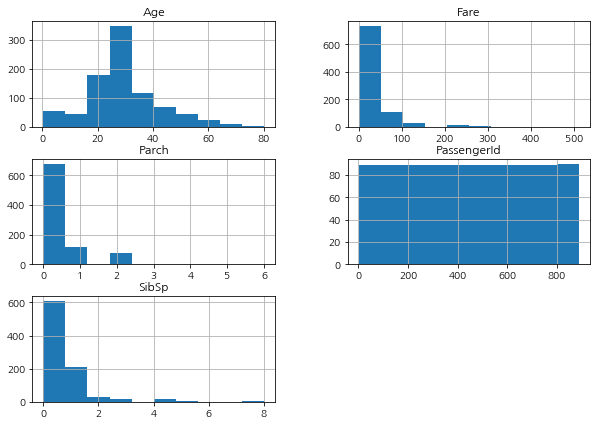

In [51]:
df_Titanic.hist(figsize=(10,7))

- 숫자형 변수 분포를 동시에 확인했다.
- 나이는 30대가 가장 많고 연령대가 높아질수록 인원이 적어진다.
- 티겟 가격은 100달러 이하가 가장 많았다.
- PassengerId는 단지 인원수를 매기기 위한 것이므로 무시한다.

----------------------------------------------------------------------------------

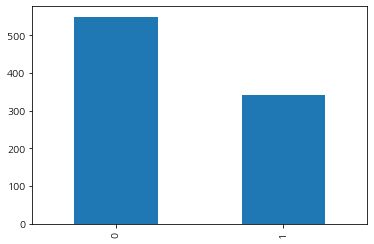

In [46]:
# Survived 생존 유무 변수 
df_sun=df_Titanic["Survived"].value_counts()
df_sun.plot.bar()
#생존한 경우 1, 사망한 경우 0

- 생존 데이터보다 사망 데이터가 더 많다.

----------------------------------------------------------------------------------

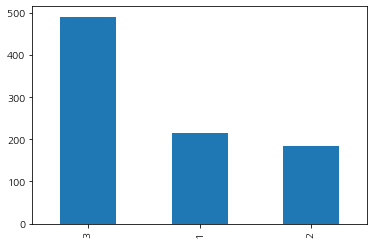

In [45]:
#Pclass 선실 등급 변수 
df_sun=df_Titanic["Pclass"].value_counts()
df_sun.plot.bar()

- 3등급 승객이 가장 많고, 1,2등급 승객은 비슷하다.

----------------------------------------------------------------------------------------

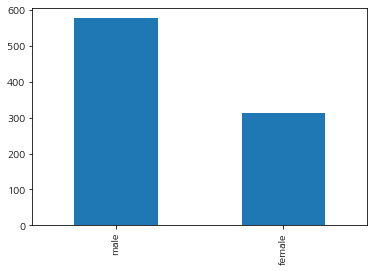

In [54]:
#Sex 성별 변수 (연속형-히스토그램으로 시각화하여 분포 확인)
df_sun=df_Titanic["Sex"].value_counts()
df_sun.plot.bar()


- 남자가 여자보다 약 2배 많다.

-------------------------------------------------------------------------------------

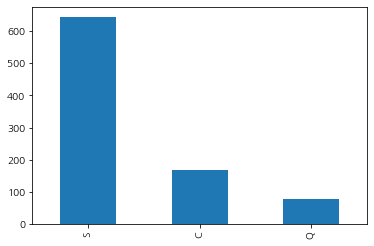

In [50]:
#Embarked 승선한 항구 변수
df_sun=df_Titanic["Embarked"].value_counts()
df_sun.plot.bar()

#Embarked 는 승선한 항구를 의미한다.
#C = Cherbourg, Q = Queenstown, S = Southampton

- Southampton에서 승선한 인원이 다른 곳에서 승선한 인원보다 약 3배 많다.

-------------------------------------------------------------------------------------

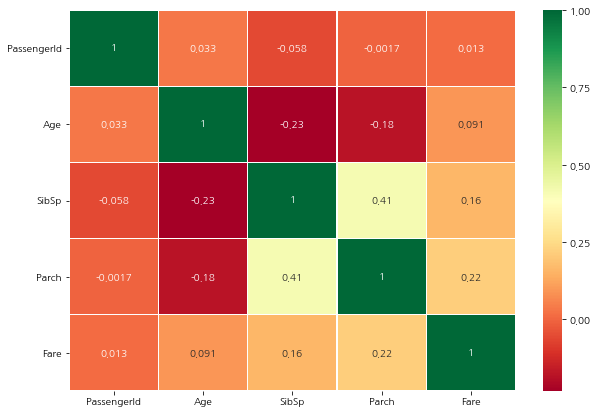

In [58]:
sns.heatmap(df_Titanic.corr(), annot=True, cmap='RdYlGn', linewidth = 0.2 )
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

- 상관관계 
  - 값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계
  - 값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계  
  - 값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계  
  - 값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계  
  - 값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계  
  - 값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계  
  - 값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계  
  
- 함께 탑승한 형제 또는 배우자의 수와 함께 탑승한 부모 또는 자녀의 수는 뚜렷한 양적 상관관계가 있고 생각해 볼 수도 있다.

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3. 변수들의 결측 및 이상치 처리

In [61]:
#데이터의 Null 값을 체크한다. 
df_Titanic.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Cabin 변수의  687 행이 missing이고 Embarked의 2개 행이 missing임을 확인할 수 있다.

- 결측 또는 이상치를 제거하는 방법은 2가지가 있다.
  - 첫번째) 평균값으로 대체하기
  - 두번째) 결측/이상 데이터가 있는 행을 제거하기

In [22]:
# 결측치가 있는 행을 제거한다.

df_Titanic.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    object 
 2   Pclass       202 non-null    object 
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 20.5+ KB


##### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### 4. 그래프 분석을 통해 변수간 관계를 확인

-------------------------------------------------------------------------------------

### 가설1: 선실 등급은 생존에 영향을 주는 설명변수일 것이다.

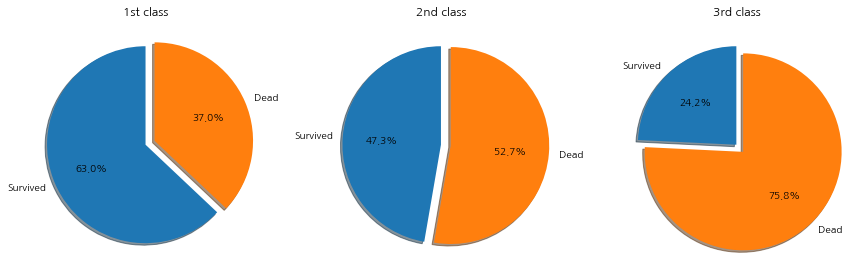

In [57]:
labels = 'Survived', 'Dead'
sizes_1 = [len(df_Titanic.loc[ (df_Titanic["Pclass"]==1) & (df_Titanic["Survived"]==1)]), \
         len(df_Titanic.loc[ (df_Titanic["Pclass"]==1)& (df_Titanic["Survived"]==0)]) ]

sizes_2 = [len(df_Titanic.loc[ (df_Titanic["Pclass"]==2) & (df_Titanic["Survived"]==1)]), \
         len(df_Titanic.loc[ (df_Titanic["Pclass"]==2)& (df_Titanic["Survived"]==0)]) ]

sizes_3 = [len(df_Titanic.loc[ (df_Titanic["Pclass"]==3) & (df_Titanic["Survived"]==1)]), \
         len(df_Titanic.loc[ (df_Titanic["Pclass"]==3)& (df_Titanic["Survived"]==0)]) ]

explode = (0, 0.1)  

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(sizes_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('1st class')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie(sizes_2, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('2nd class')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax3.pie(sizes_3, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax3.set_title('3rd class')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

- 선실 등급이 낮을수록 (고급 선실일수록) 사망자 수가 적음을 알 수 있다.
- 가설은 '참'

-------------------------------------------------------------------------------------

### 가설2: 성별은 생존에 영향을주는 설명변수일 것이다

In [23]:
df_Titanic.groupby(['Sex','Survived'])['Survived'].count()   #성별과 생존자에 대해 확인을 해본다.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

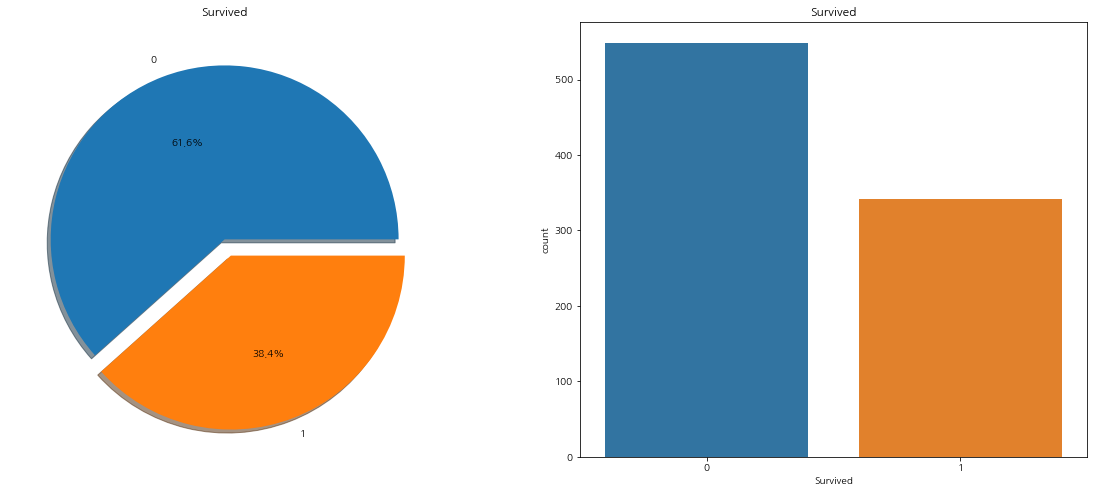

In [37]:
#matplotlib를 이용하여 생존자의 수를 확인한다.
f,ax = plt.subplots(1,2,figsize=(20,8))
df_Titanic['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
#print(ax[1])
sns.countplot('Survived',data=df_Titanic,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- Survived 가 1이 생존자를 표시함. 대략 38.4%가 생존했으며 300명 이상이 생존하고, 600명 가까이 사망한 것을 알 수 있다.

In [68]:
#남성의 생존률
len(df_Titanic.loc[ (df_Titanic["Sex"]=='male') & (df_Titanic["Survived"]==1)]) / len(df_Titanic.loc[ (df_Titanic["Sex"]=='male') ])


0.18890814558058924

In [69]:
#여성의 생존률
len(df_Titanic.loc[ (df_Titanic["Sex"]=='female') & (df_Titanic["Survived"]==1)]) / len(df_Titanic.loc[ (df_Titanic["Sex"]=='female') ]) 

0.7420382165605095

- 남성보다 여성의 생존률이 3배 이상 높다.
- 가설은 '참'

-------------------------------------------------------------------------------------

### 가설3: 나이는 생존에 영향을 주는 설명변수일 것이다.

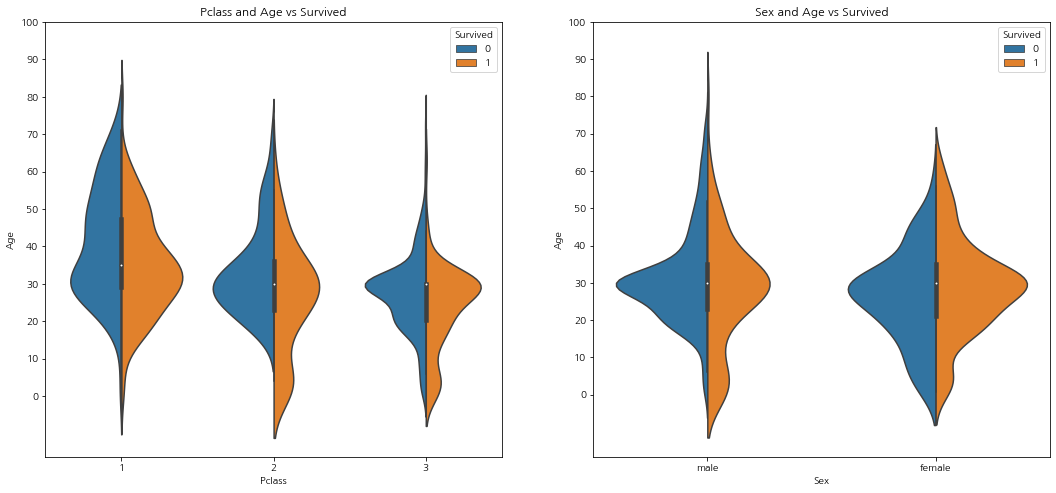

In [73]:
f, ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot("Pclass", "Age", hue = 'Survived', data= df_Titanic, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', "Age", hue = "Survived", data = df_Titanic, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 좌측에서 Pclass = 1일때는 생존자 연령평균이 사망자 연령 평균보다 낮다는 것을 알 수 있다. 

- Pclass =1 인 경우를 제외하고는 모두 평균은 비슷하게 분포하는데, 대신 영유아의 경우 생존을 좀 더 잘했다고 할 수 있다.


- 우측도 마찬가지로 영유아가 생존하는데 유리했다고 할 수 있다. 
- 평균은 비슷하게 분포하나 여성남성 모두의 경우 생존자의 연령 평균이 약간 더 높다고 할 수 있다.
- 가설은 애매하다.

-------------------------------------------------------------------------------------

### 가설4: 승선장소는 생존에 영향을 주는 설명변수일 것이다.

In [78]:
pd.crosstab([df_Titanic.Embarked, df_Titanic.Pclass], [df_Titanic.Sex, df_Titanic.Survived], margins=True).style.background_gradient(cmap = 'summer_r')

- Embarked = S 에서 사망했을 확률이 좀 더 높다.
- 가설은 '참'

-------------------------------------------------------------------------------------

### 가설5: 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.

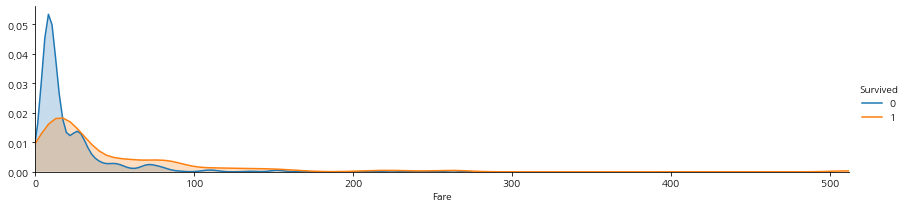

In [91]:
facet = sns.FacetGrid(df_Titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, df_Titanic['Fare'].max()))
facet.add_legend()

plt.show()

- 저렴한 티켓을 구매한 사람은 사망률이 높고 상대적으로 비싼 티켓을 구매한 사람은 생존률이 높다는 것을 알 수 있다.
- 가설은 '참'

-------------------------------------------------------------------------------------

### 가설6: 함께 탑승수(형제, 배우자)는 생존에 영향을 주는 설명변수일 것이다.

In [87]:
pd.crosstab([df_Titanic.SibSp], df_Titanic.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


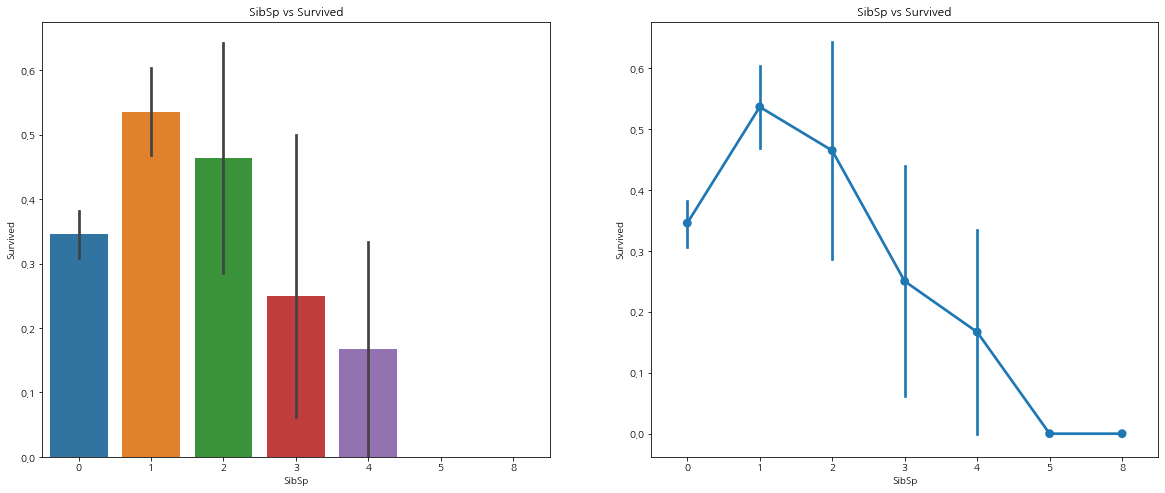

In [90]:
f, ax = plt.subplots(1,2,figsize = (20, 8))
sns.barplot('SibSp', 'Survived', data = df_Titanic, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data= df_Titanic, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

- SibSp(형제자매, 배우자)이 없는 사람들은 34.5%정도의 생존율을 보였지만 형제 자매가 있으면 생존율이 올라갔다.
- 가설은 '참'

-------------------------------------------------------------------------------------

### 가설7: 합께 탑승수(자녀, 부모)는 생존에 영향을 주는 설명변수일 것이다.

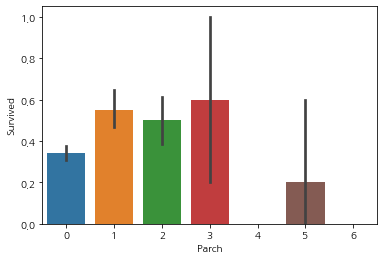

In [93]:
sns.barplot(x="Parch", y="Survived",data=df_Titanic)

- 데이터 분석 결과 값이 비교적 균등하게 나와 생존에 영향을 많이 미치는 변수라고 보긴 어렵다.
- 가설은 애매하다.

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### 5. 생존에 영향을 미치는 잠재 인자 도출

1. 선실 등급이 높을수록 생존 확률이 높다.
2. 여성의 생존률이 더 높다.
3. 여성남성 모두의 경우 생존자의 연령 평균이 약간 더 높다고 할 수 있다.
4. Embarked = S 에서 타지 않은 승객의 생존 확률이 높다.
5. 티켓 가격이 높을수록 생존 확률이 높다.
6. 형제 자매가 있으면 생존 확률이 높다.